In [ ]:
!pip install yfinance catboost pandas numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


##Cat Boost Algorithm

[*********************100%***********************]  1 of 1 completed


0:	learn: 54.4167420	total: 2.63ms	remaining: 2.62s
100:	learn: 1.6726746	total: 215ms	remaining: 1.92s
200:	learn: 1.3517213	total: 417ms	remaining: 1.66s
300:	learn: 1.2112407	total: 623ms	remaining: 1.45s
400:	learn: 1.1047440	total: 828ms	remaining: 1.24s
500:	learn: 1.0186965	total: 1.06s	remaining: 1.06s
600:	learn: 0.9427457	total: 1.26s	remaining: 839ms
700:	learn: 0.8784938	total: 1.46s	remaining: 623ms
800:	learn: 0.8213102	total: 1.67s	remaining: 415ms
900:	learn: 0.7737284	total: 1.87s	remaining: 205ms
999:	learn: 0.7369667	total: 2.1s	remaining: 0us
Mean Squared Error: 4.788215666442955


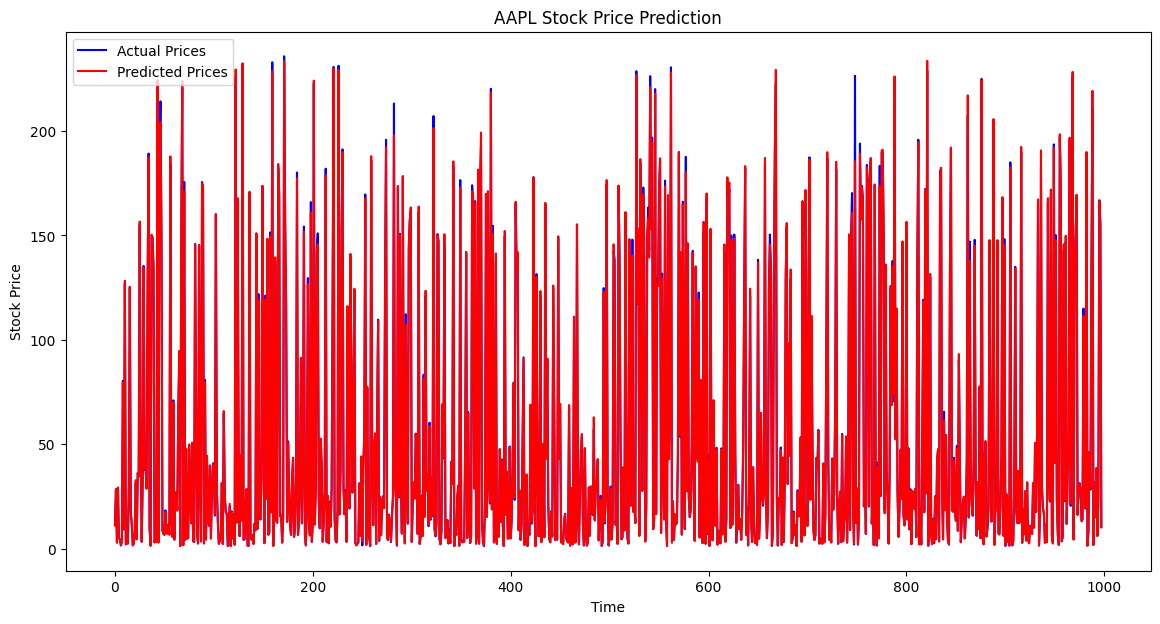

Today's actual price: Ticker
AAPL    230.570007
Name: 2024-10-24 00:00:00+00:00, dtype: float64
Predicted price for today: 10.271863584065507


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Stock Price Data
ticker = 'AAPL'  # You can change this to any stock symbol
stock_data = yf.download(ticker, start='2005-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
stock_data['Date'] = stock_data.index
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Target'] = stock_data['Close'].shift(-1)  # Predict next day's closing price
stock_data.dropna(inplace=True)

# Features and Target
X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = stock_data['Target']

# Step 3: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the CatBoost Model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print predicted price and today's actual price
latest_actual_price = stock_data['Close'].iloc[-1]
latest_predicted_price = predictions[-1]
print(f"Today's actual price: {latest_actual_price}")
print(f"Predicted price for today: {latest_predicted_price}")



[*********************100%***********************]  1 of 1 completed


0:	learn: 91.9893304	total: 4.86ms	remaining: 4.86s
100:	learn: 4.6342468	total: 339ms	remaining: 3.02s
200:	learn: 3.8225173	total: 718ms	remaining: 2.85s
300:	learn: 3.3647436	total: 968ms	remaining: 2.25s
400:	learn: 3.0168304	total: 1.14s	remaining: 1.7s
500:	learn: 2.6753226	total: 1.33s	remaining: 1.32s
600:	learn: 2.4069588	total: 1.52s	remaining: 1.01s
700:	learn: 2.1915370	total: 1.72s	remaining: 736ms
800:	learn: 2.0107278	total: 1.9s	remaining: 472ms
900:	learn: 1.8470209	total: 2.08s	remaining: 229ms
999:	learn: 1.7029723	total: 2.36s	remaining: 0us
Mean Squared Error: 24.83610632374132


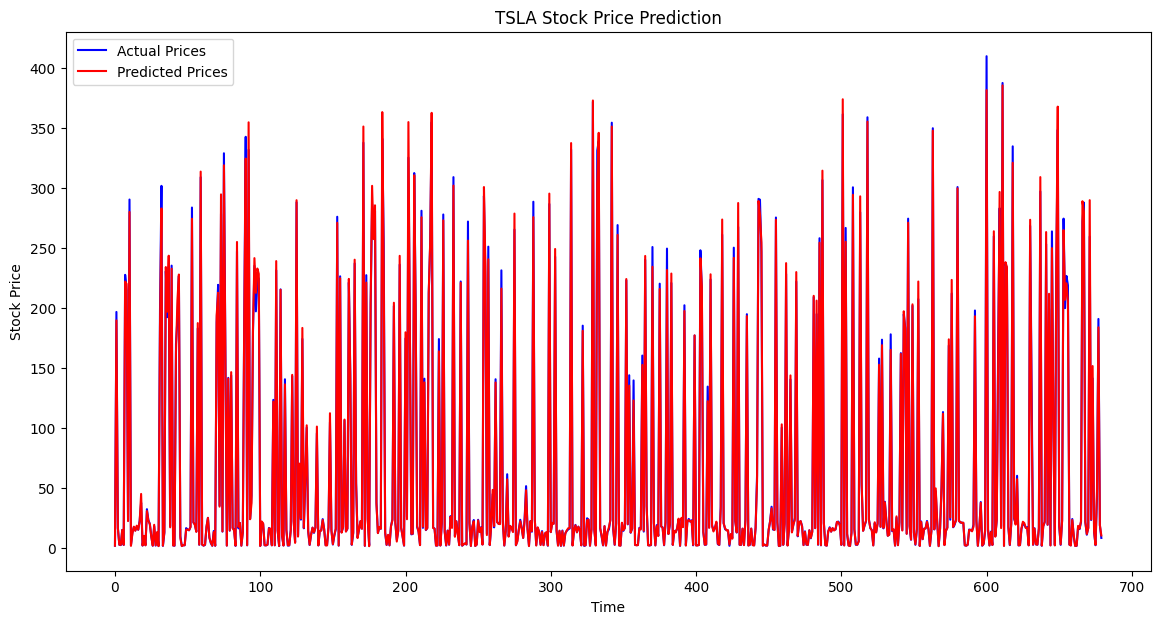

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Stock Price Data
ticker = 'TSLA'  # You can change this to any stock symbol
stock_data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

# Step 2: Preprocess the Data
stock_data['Date'] = stock_data.index
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Target'] = stock_data['Close'].shift(-1)  # Predict next day's closing price
stock_data.dropna(inplace=True)

# Features and Target
X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = stock_data['Target']

# Step 3: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the CatBoost Model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


0:	learn: 9.9303478	total: 9.58ms	remaining: 9.57s
100:	learn: 0.3993026	total: 402ms	remaining: 3.58s
200:	learn: 0.3233621	total: 716ms	remaining: 2.84s
300:	learn: 0.2808827	total: 907ms	remaining: 2.1s
400:	learn: 0.2468325	total: 1.09s	remaining: 1.63s
500:	learn: 0.2232941	total: 1.27s	remaining: 1.27s
600:	learn: 0.2028729	total: 1.47s	remaining: 974ms
700:	learn: 0.1863859	total: 1.65s	remaining: 702ms
800:	learn: 0.1707927	total: 1.83s	remaining: 454ms
900:	learn: 0.1575601	total: 2s	remaining: 220ms
999:	learn: 0.1456949	total: 2.19s	remaining: 0us
Mean Squared Error: 0.27201575243261683


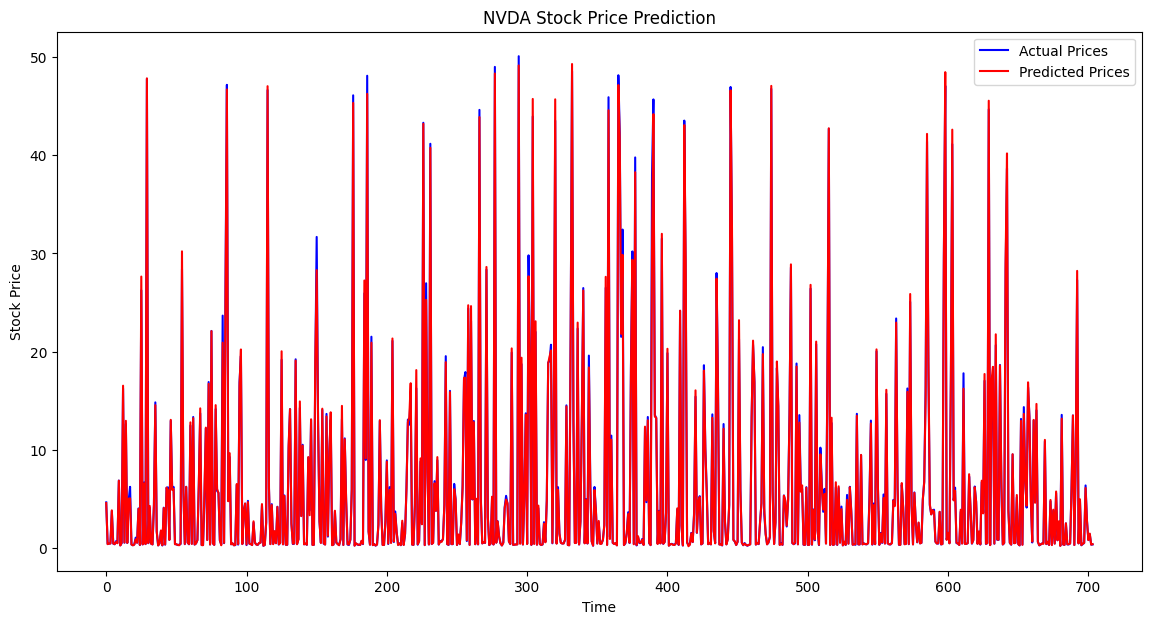

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Stock Price Data
ticker = 'NVDA'  # You can change this to any stock symbol
stock_data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

# Step 2: Preprocess the Data
stock_data['Date'] = stock_data.index
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Target'] = stock_data['Close'].shift(-1)  # Predict next day's closing price
stock_data.dropna(inplace=True)

# Features and Target
X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = stock_data['Target']

# Step 3: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the CatBoost Model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


## LSTM

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 2.3874e-04 - val_loss: 0.0015
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 2.3544e-04 - val_loss: 0.0023
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 1.9885e-04 - val_loss: 0.0036
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 1.8136e-04 - val_loss: 8.3835e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 1.6822e-04 - val_loss: 0.0072
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 1.5931e-04 - val_loss: 7.5081e-04
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 1.3708e-04 - val_loss: 7.4752e-04
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - loss: 1.9325e-04 - val_loss: 0.0026
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 1.3228e-04 - val_loss: 8.8374e-04
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 1.7177e-

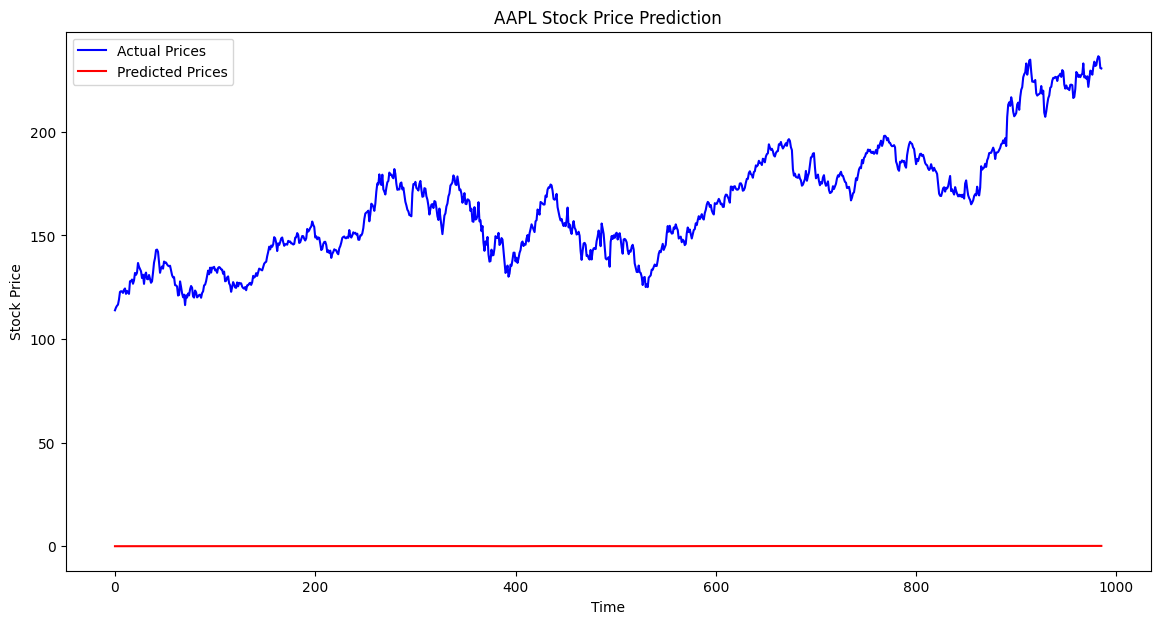

Today's actual price: Ticker
AAPL    230.570007
Name: 2024-10-24 00:00:00+00:00, dtype: float64
Predicted price for today: 0.13625556525573798


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Fetch Stock Price Data
ticker = 'AAPL'  # You can change this to any stock symbol
stock_data = yf.download(ticker, start='2005-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
stock_data['Date'] = stock_data.index
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Target'] = stock_data['Close'].shift(-1)  # Predict next day's closing price
stock_data.dropna(inplace=True)

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']])

# Define the window size (sequence length)
window_size = 60  # You can adjust this based on the data

# Create sequences and reshape data for LSTM
X = []
y = []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i])
    y.append(scaled_data[i, 3])  # Target is the scaled 'Close' price

X, y = np.array(X), np.array(y)

# Step 3: Train Test Split
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((np.zeros((len(predictions), 5)), predictions), axis=1))[:, 5]

# Evaluate the model
mse = mean_squared_error(scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5], predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'].values[-len(y_test):], label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print predicted price and today's actual price
latest_actual_price = stock_data['Close'].iloc[-1]
latest_predicted_price = predictions[-1]
print(f"Today's actual price: {latest_actual_price}")
print(f"Predicted price for today: {latest_predicted_price}")
